In [1]:
import numpy as np
import pandas as pd
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
# collection of machine learning algorithms



from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 250), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

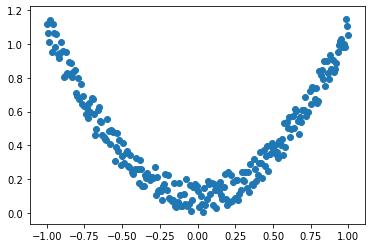

In [4]:
plt.scatter(x=x, y=y);
plt.show()

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,200)
        
        self.fc2 = nn.Linear(200,20)
        self.fc3 = nn.Linear(20,10)
        self.fc4 = nn.Linear(10,1)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
    
        
        #print("before",x.size())
        #x = x.view(-1,10,20)
        
    
        #print("after")
        #print(x.size())
        
        
        return x
    
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=1, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02 )

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [8]:
x_var_test = Variable(torch.FloatTensor(x_test))
y_var_test = Variable(torch.FloatTensor(y_test))
x_var_train = Variable(torch.FloatTensor(x_train))
y_var_train = Variable(torch.FloatTensor(y_train))

In [9]:
epoch = 500
model.train()
train_loss = 1000000

batch_size = 64
lossTrainList = []
epochList = []
lossTestList = []


for epochNum in range(epoch):

    optimizer.zero_grad()
    y_pred = model(x_var_train)
    
    #print(y_pred.size())
    #print(y_var_train.size())
    
    #print(y_pred)
    
    
    loss = criterion(y_pred, y_var_train)
  
    print("Epoch {}: train loss: {}".format(epochNum, loss.item()))
    
    loss.backward()
    optimizer.step()
    
    
    lossVal = loss.item()*1
    
    if train_loss > lossVal:
    
        torch.save(model.state_dict(), "model.pt")
    
        lossTrainList.append(lossVal)
        epochList.append(epochNum)
        train_loss = lossVal

Epoch 0: train loss: 0.25833457708358765
Epoch 1: train loss: 0.2052607238292694
Epoch 2: train loss: 0.16827529668807983
Epoch 3: train loss: 0.14248649775981903
Epoch 4: train loss: 0.1246979758143425
Epoch 5: train loss: 0.11262759566307068
Epoch 6: train loss: 0.10458170622587204
Epoch 7: train loss: 0.09930241852998734
Epoch 8: train loss: 0.09587546437978745
Epoch 9: train loss: 0.09365680813789368
Epoch 10: train loss: 0.09220778942108154
Epoch 11: train loss: 0.09123898297548294
Epoch 12: train loss: 0.09056463092565536
Epoch 13: train loss: 0.09006836265325546
Epoch 14: train loss: 0.08967864513397217
Epoch 15: train loss: 0.08935217559337616
Epoch 16: train loss: 0.08906305581331253
Epoch 17: train loss: 0.0887959823012352
Epoch 18: train loss: 0.0885419100522995
Epoch 19: train loss: 0.088295578956604
Epoch 20: train loss: 0.08805388957262039
Epoch 21: train loss: 0.08781503140926361
Epoch 22: train loss: 0.0875779464840889
Epoch 23: train loss: 0.08734200149774551
Epoch 24:

Epoch 193: train loss: 0.03669515997171402
Epoch 194: train loss: 0.036331772804260254
Epoch 195: train loss: 0.0359688475728035
Epoch 196: train loss: 0.03560643270611763
Epoch 197: train loss: 0.035244569182395935
Epoch 198: train loss: 0.0348832830786705
Epoch 199: train loss: 0.034522660076618195
Epoch 200: train loss: 0.034162722527980804
Epoch 201: train loss: 0.03380352631211281
Epoch 202: train loss: 0.033445119857788086
Epoch 203: train loss: 0.03308757022023201
Epoch 204: train loss: 0.032730892300605774
Epoch 205: train loss: 0.032375168055295944
Epoch 206: train loss: 0.03202041611075401
Epoch 207: train loss: 0.03166671097278595
Epoch 208: train loss: 0.03131409361958504
Epoch 209: train loss: 0.030962612479925156
Epoch 210: train loss: 0.030612321570515633
Epoch 211: train loss: 0.030263260006904602
Epoch 212: train loss: 0.029915500432252884
Epoch 213: train loss: 0.029569072648882866
Epoch 214: train loss: 0.029224030673503876
Epoch 215: train loss: 0.028880422934889793

Epoch 380: train loss: 0.00426501827314496
Epoch 381: train loss: 0.004250211175531149
Epoch 382: train loss: 0.004235835745930672
Epoch 383: train loss: 0.004221880808472633
Epoch 384: train loss: 0.004208334255963564
Epoch 385: train loss: 0.004195179790258408
Epoch 386: train loss: 0.004182414151728153
Epoch 387: train loss: 0.004170021042227745
Epoch 388: train loss: 0.004157989751547575
Epoch 389: train loss: 0.004146313760429621
Epoch 390: train loss: 0.004134976305067539
Epoch 391: train loss: 0.004123971797525883
Epoch 392: train loss: 0.004113290924578905
Epoch 393: train loss: 0.004102922976016998
Epoch 394: train loss: 0.004092857241630554
Epoch 395: train loss: 0.0040830890648067
Epoch 396: train loss: 0.004073604941368103
Epoch 397: train loss: 0.004064398352056742
Epoch 398: train loss: 0.004055458586663008
Epoch 399: train loss: 0.004046782851219177
Epoch 400: train loss: 0.004038360435515642
Epoch 401: train loss: 0.004030182957649231
Epoch 402: train loss: 0.0040222438

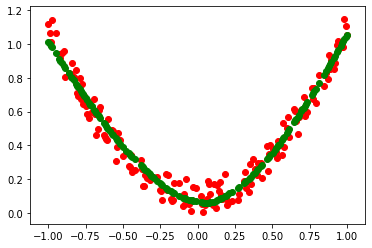

In [10]:
plt.scatter(x=x_var_train.detach().numpy(), y=y_train.detach().numpy(), color = "red");
plt.scatter(x=x_var_train.detach().numpy(), y=y_pred.detach().numpy(), color = "green")
plt.show()

In [11]:
y_pred2 = model(x_var_test)

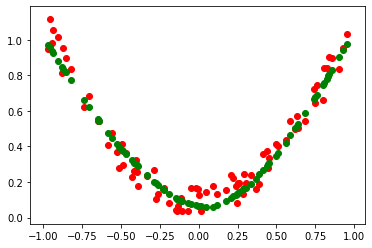

In [12]:
plt.scatter(x=x_var_test.detach().numpy(), y=y_test.detach().numpy(), color = "red");
plt.scatter(x=x_var_test.detach().numpy(), y=y_pred2.detach().numpy(), color = "green")
plt.show()

In [13]:
y_pred

tensor([[0.7334],
        [0.0976],
        [0.9546],
        [0.7230],
        [0.5911],
        [0.8696],
        [0.9801],
        [0.9916],
        [0.7545],
        [0.6912],
        [0.7346],
        [0.4052],
        [0.4405],
        [0.0635],
        [0.0602],
        [0.8069],
        [0.3568],
        [0.0602],
        [0.4588],
        [0.4834],
        [0.2615],
        [0.4862],
        [0.9912],
        [1.0532],
        [0.1182],
        [0.3322],
        [0.2205],
        [0.9011],
        [0.2043],
        [0.2830],
        [0.8556],
        [0.5815],
        [0.8591],
        [0.7229],
        [0.4953],
        [0.7704],
        [0.7964],
        [0.5474],
        [0.5331],
        [0.2269],
        [1.0039],
        [0.0669],
        [0.0883],
        [0.6453],
        [0.3891],
        [0.0661],
        [0.3825],
        [0.1239],
        [0.0611],
        [0.5621],
        [0.4409],
        [0.0844],
        [0.1538],
        [0.0894],
        [0.3158],
        [0

In [14]:
x_var_train

tensor([[-0.7912],
        [-0.1245],
        [ 0.9357],
        [ 0.7831],
        [-0.6787],
        [-0.8956],
        [-0.9759],
        [ 0.9598],
        [-0.8072],
        [-0.7590],
        [ 0.7912],
        [-0.5181],
        [-0.5502],
        [ 0.1004],
        [ 0.0361],
        [-0.8474],
        [ 0.5020],
        [ 0.0763],
        [-0.5663],
        [ 0.6064],
        [-0.3574],
        [-0.5904],
        [-0.9839],
        [ 1.0000],
        [-0.1647],
        [ 0.4779],
        [-0.3092],
        [-0.9197],
        [ 0.3494],
        [ 0.4297],
        [ 0.8715],
        [-0.6707],
        [-0.8876],
        [-0.7831],
        [-0.5984],
        [ 0.8153],
        [-0.8394],
        [ 0.6546],
        [-0.6305],
        [ 0.3735],
        [ 0.9679],
        [-0.0120],
        [ 0.1647],
        [ 0.7269],
        [-0.5020],
        [ 0.1084],
        [ 0.5261],
        [ 0.2289],
        [ 0.0843],
        [-0.6546],
        [ 0.5743],
        [ 0.1566],
        [ 0.